In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np 


iris = pd.read_csv('iris.csv')


shuffled_rows = np.random.permutation(iris.index)
iris = iris.loc[shuffled_rows,:]

In [4]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

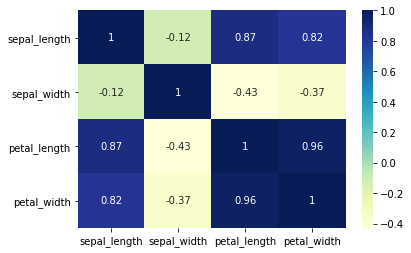

In [5]:
import seaborn as sns
sns.heatmap(iris.corr(),annot=True,cmap='YlGnBu')
plt.show()

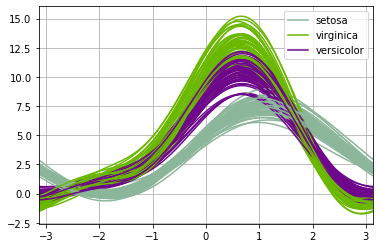

In [6]:
from pandas import plotting

plotting.andrews_curves(iris,'species')
plt.show()

In [7]:
iris_norm = iris[iris.columns[0:4]].apply(lambda x :(x -
                                x.min())/(x.max()-x.min()))

iris_norm.sample(n=4)

,sepal_length,sepal_width,petal_length,petal_width
126,0.527778,0.333333,0.644068,0.708333
68,0.527778,0.083333,0.593220,0.583333
80,0.333333,0.166667,0.474576,0.416667
20,0.305556,0.583333,0.118644,0.041667


In [8]:
target = iris[['species']].replace(iris.species.unique(), [0,1,2])

In [10]:
df = pd.concat([iris_norm,target], axis =1)

df.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
60,0.194444,0.000000,0.423729,0.375000,2
9,0.166667,0.458333,0.084746,0.000000,0
38,0.027778,0.416667,0.050847,0.041667,0
109,0.805556,0.666667,0.864407,1.000000,1
31,0.305556,0.583333,0.084746,0.125000,0


In [11]:


from sklearn.preprocessing import StandardScaler, LabelBinarizer



In [14]:
X = df[['sepal_length', 'sepal_length', 'petal_length', 'petal_width']]
y = df['species']

X = StandardScaler().fit_transform(X)
y = LabelBinarizer().fit_transform(y)

In [15]:
import keras

from keras.models import Sequential
from keras.layers import Dense



In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [40]:
mymodel = Sequential()
mymodel.add(Dense(12,input_dim=4,activation='relu'))
mymodel.add(Dense(units=8,activation='relu'))
mymodel.add(Dense(units=10,activation='relu'))


mymodel.add(Dense(units=3,activation='softmax'))

mymodel.compile(loss='categorical_crossentropy',optimizer ='adam', metrics =['accuracy'])

history = mymodel.fit(X_train,y_train,epochs=120,
                  validation_data=(X_test,y_test))


Epoch 1/120
4/4 [==============================] - 0s 28ms/step - loss: 1.3215 - accuracy: 0.2167 - val_loss: 1.2850 - val_accuracy: 0.2000
Epoch 2/120
4/4 [==============================] - 0s 4ms/step - loss: 1.2905 - accuracy: 0.2167 - val_loss: 1.2588 - val_accuracy: 0.2000
Epoch 3/120
4/4 [==============================] - 0s 4ms/step - loss: 1.2622 - accuracy: 0.2083 - val_loss: 1.2355 - val_accuracy: 0.2333
Epoch 4/120
4/4 [==============================] - 0s 4ms/step - loss: 1.2352 - accuracy: 0.2167 - val_loss: 1.2137 - val_accuracy: 0.2333
Epoch 5/120
4/4 [==============================] - 0s 4ms/step - loss: 1.2111 - accuracy: 0.2167 - val_loss: 1.1926 - val_accuracy: 0.2333
Epoch 6/120
4/4 [==============================] - 0s 4ms/step - loss: 1.1886 - accuracy: 0.2167 - val_loss: 1.1715 - val_accuracy: 0.2333
Epoch 7/120
4/4 [==============================] - 0s 4ms/step - loss: 1.1674 - accuracy: 0.2167 - val_loss: 1.1516 - val_accuracy: 0.2667
Epoch 8/120
4/4 [=========

4/4 [==============================] - 0s 4ms/step - loss: 0.3712 - accuracy: 0.8667 - val_loss: 0.3669 - val_accuracy: 0.8667
Epoch 60/120
4/4 [==============================] - 0s 4ms/step - loss: 0.3618 - accuracy: 0.8750 - val_loss: 0.3582 - val_accuracy: 0.8667
Epoch 61/120
4/4 [==============================] - 0s 4ms/step - loss: 0.3526 - accuracy: 0.8750 - val_loss: 0.3500 - val_accuracy: 0.8667
Epoch 62/120
4/4 [==============================] - 0s 4ms/step - loss: 0.3436 - accuracy: 0.8750 - val_loss: 0.3420 - val_accuracy: 0.9000
Epoch 63/120
4/4 [==============================] - 0s 4ms/step - loss: 0.3351 - accuracy: 0.8833 - val_loss: 0.3342 - val_accuracy: 0.9000
Epoch 64/120
4/4 [==============================] - 0s 4ms/step - loss: 0.3260 - accuracy: 0.8917 - val_loss: 0.3269 - val_accuracy: 0.9000
Epoch 65/120
4/4 [==============================] - 0s 4ms/step - loss: 0.3176 - accuracy: 0.9083 - val_loss: 0.3194 - val_accuracy: 0.9000
Epoch 66/120
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 0.0984 - accuracy: 0.9500 - val_loss: 0.1550 - val_accuracy: 0.9667
Epoch 118/120
4/4 [==============================] - 0s 4ms/step - loss: 0.0978 - accuracy: 0.9500 - val_loss: 0.1563 - val_accuracy: 0.9667
Epoch 119/120
4/4 [==============================] - 0s 4ms/step - loss: 0.0963 - accuracy: 0.9500 - val_loss: 0.1564 - val_accuracy: 0.9667
Epoch 120/120
4/4 [==============================] - 0s 4ms/step - loss: 0.0961 - accuracy: 0.9500 - val_loss: 0.1550 - val_accuracy: 0.9667


In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

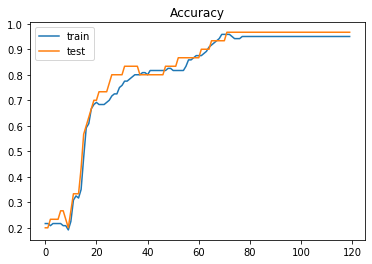

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()

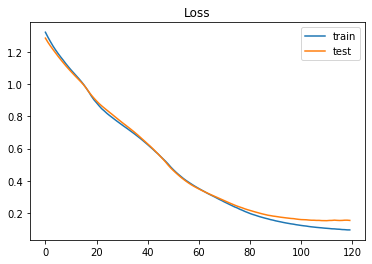

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.legend(['train', 'test'])
plt.show()